## Esercizio 1

In un certo ufficio di una ditta arrivano gli ordini da parte dei clienti con una media di 10
ordini al giorno. Di tutti gli ordini che arrivano una frazione del 2% non può essere
soddisfatta in quanto si riferisce ad articoli fuori produzione.

- I. Quale distribuzione può essere appropriata per la variabile aleatoria che conta il
numero di ordini arrivati in un giorno a caso? Sotto quali ipotesi? Calcolare la
probabilità che in un giorno arrivino non più di 3 ordini.

- II. Quale distribuzione può essere appropriata per la variabile aleatoria che conta il
numero di ordini che non possono essere soddisfatti su 100 ordini arrivati? Sotto quali
ipotesi? Calcolare la probabilità che su 100 ordini arrivati almeno 2 non possano
essere soddisfatti.

In [16]:
from scipy.stats import poisson

# La v.a X segue una dist. di Poisson poichè modella un evento di successo-insuccesso
# con un alto numero di prove (poichè contiamo quanti ordini ricevo+quanti non ricevo)
# Ipotizzando che in un giorno a caso arrivino esattamente 10 ordini si ha:

lam = 10 # tasso medio di successi
k = 3

P = poisson.cdf(k, lam)
print(f"Probabilià che in un giorno arrivino non più di {k} ordini è: {P:.3f}")binom

Probabilià che in un giorno arrivino non più di 3 ordini è: 0.010


In [20]:
from scipy.stats import binom

n = 100
k = 2
p = 2/100

# P(X > 1)
P = binom.sf(k-1, n, p)
print(f'Porbabilità: {P:.3f}')

Porbabilità: 0.597


## Esercizio 2

I seguenti dati di deformazione laterale (εY) e longitudinale (εX) sono stati ottenuti
sottoponendo a sforzo delle barre fabbricate con una lega sperimentale:

I. Calcolare il coefficiente di correlazione delle variabili εX , εY.<br>
II. È ragionevole supporre che sussista una relazione lineare tra le variabili?<br>
III. Determinare la retta di regressione e calcolare la deformazione laterale corrispondente
ai valori εX = 0.35 e εX = 0.8.

In [26]:
import numpy as np

x = np.array([0.3, 0.4, 0.2, 0.5, 0.6])
y = np.array([0.11, 0.14, 0.06, 0.16, 0.22])

n = x.size
k = 2

x1 = np.ones(n)
x2 = x
X = np.ones((n, k))
X[:,0] = x1
X[:,1] = x2

XX = np.linalg.pinv(X)
b = XX@y
y_hat = X@b
y_bar = np.mean(y)

R2 = np.sum((y_hat-y_bar)**2)/np.sum((y-y_bar)**2)
R = np.sqrt(R2)
print(f'Coefficiente di correlazione: {R:.3f}')

print('Esiste una relazione lineare tra le variabili' if (R > 0.8) else 'Non esiste una relazione lineare tra le variabili')

Coefficiente di correlazione: 0.986
Esiste una relazione lineare tra le variabili


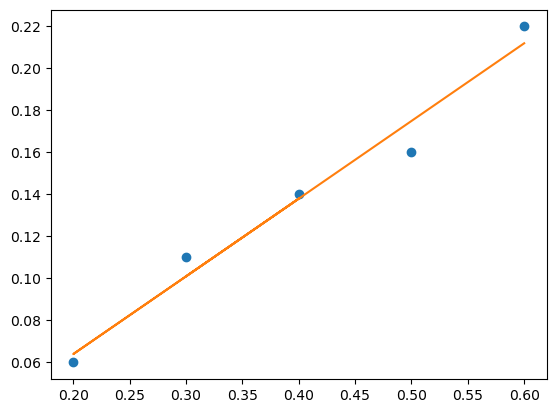

In [32]:
import matplotlib.pyplot as plt

Y = b[0]*x1 + b[1]*x2

plt.plot(x, y, 'o')
plt.plot(x, Y)
plt.show()

Per εX = 0.35 si ha la predizione Y = 0.119


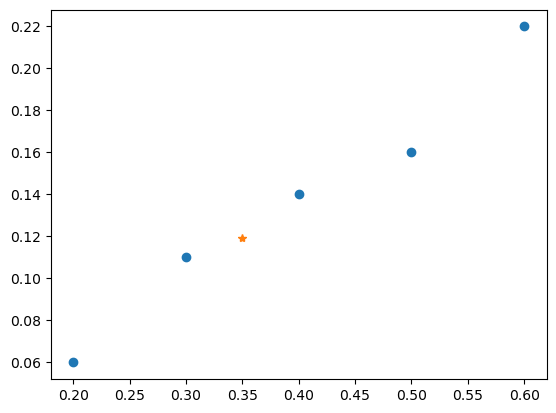

In [43]:
x_star = 0.35
Y = b[0] + b[1]*x_star
print(f'Per εX = {x_star} si ha la predizione Y = {Y:.3f}')

plt.plot(x, y, 'o')
plt.plot(x_star, Y, '*')
plt.show()

Per εX = 0.8 si ha la predizione Y = 0.286


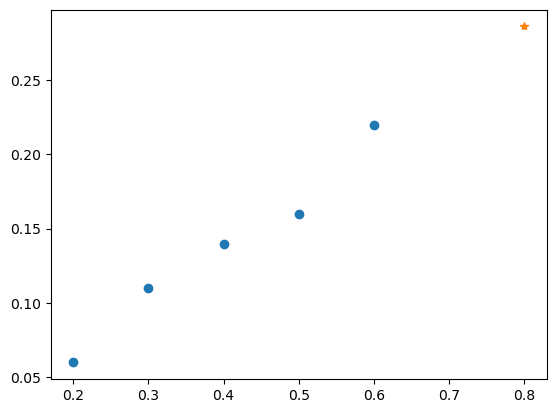

In [44]:
x_star = 0.8
Y = b[0] + b[1]*x_star
print(f'Per εX = {x_star} si ha la predizione Y = {Y:.3f}')

plt.plot(x, y, 'o')
plt.plot(x_star, Y, '*')
plt.show()